# 🏠 🎓 Analisis Regresi pada Student Performance Dataset Menggunakan Decision Tree dan Random Forest Regression 
## 🎯 Tujuan Proyek

Proyek ini bertujuan untuk membangun dan membandingkan performa dua algoritma regresi non-linear, yaitu Decision Tree Regressor dan Random Forest Regressor, dalam memprediksi nilai median harga rumah (Median House Value) berdasarkan karakteristik demografis dan geografis wilayah di California.

Dataset yang digunakan adalah Student Performance Dataset, yang berisi kombinasi data numerik dan kategorik, seperti jam belajar, tingkat kehadiran, nilai sebelumnya, jenis kelamin, tingkat pendidikan orang tua, serta faktor pendukung lainnya.

## ⚙️ **Ruang Lingkup dan Tujuan Analisis**

Analisis pada notebook ini difokuskan pada regresi non-linear, dengan tujuan untuk:

Melakukan exploratory data analysis (EDA) guna memahami karakteristik dataset, termasuk pengecekan nilai kosong, duplikasi data, dan distribusi fitur numerik.

Menentukan fitur (X) dan target (y), di mana target yang digunakan adalah performa siswa.

Membangun dua pipeline model regresi non-linear, yaitu:

Pipeline 1: Decision Tree Regressor

Pipeline 2: Random Forest Regressor

Membandingkan performa kedua model menggunakan:

Dua metode penskalaan data: StandardScaler dan MinMaxScaler

Dua metode seleksi fitur: SelectKBest dan SelectPercentile

Melakukan hyperparameter tuning menggunakan GridSearchCV dengan metode Cross Validation.

Mengevaluasi performa model berdasarkan metrik regresi R², Mean Squared Error (MSE), Mean Absolute Error (MAE), dan Root Mean Squared Error (RMSE).

## 🌳 **Alasan Pemilihan Model**

Decision Tree Regressor dipilih karena kemampuannya dalam menangkap hubungan non-linear antar fitur tanpa memerlukan asumsi bentuk hubungan tertentu, serta kemudahan dalam interpretasi struktur pohon keputusan. Model ini sesuai untuk menganalisis pengaruh berbagai faktor akademik dan non-akademik terhadap performa siswa.

Random Forest Regressor digunakan sebagai model ensemble yang mengombinasikan banyak decision tree untuk meningkatkan stabilitas dan akurasi prediksi. Dengan mekanisme agregasi beberapa pohon, model ini mampu mengurangi overfitting yang sering terjadi pada decision tree tunggal dan memberikan performa yang lebih baik pada data uji.

## 🧩 **Tahapan Eksperimen**

Tahapan eksperimen dalam penelitian ini dilakukan sebagai berikut:

### 1 Data Understanding dan Data Cleaning
Membaca dataset, menampilkan contoh data, informasi kolom, serta statistik deskriptif.
Dilakukan pengecekan missing value, data duplikat, dan outlier.

### 2 Data Encoding
Mengidentifikasi fitur kategorik dan melakukan encoding (misalnya One-Hot Encoding) untuk mengubah data kategorik menjadi bentuk numerik yang dapat diproses oleh model regresi.

### 3 Penentuan Fitur dan Target
Menentukan variabel fitur (X) dan variabel target (y) berupa nilai performa siswa.

### 4 Train–Test Split
Membagi dataset menjadi data latih dan data uji dengan rasio 80:20 / 75:25 / 70:30, serta menggunakan nilai random_state sesuai ketentuan UAS.

### 5 Pembangunan Pipeline Model
Menyusun pipeline yang mencakup:
    + Scaling (StandardScaler dan MinMaxScaler)
    + Feature selection (SelectKBest dan SelectPercentile)
    + Model regresi (Decision Tree dan Random Forest)

### 6 Hyperparameter Tuning dan Cross Validation
Melakukan pencarian parameter terbaik menggunakan GridSearchCV dengan metode Cross Validation.

### 7 Evaluasi dan Visualisasi
Mengevaluasi performa model menggunakan R², MSE, MAE, dan RMSE, serta menampilkan visualisasi:
    * Scatterplot matrix antar fitur
    * Plot residual data training dan testing
    * Plot hubungan fitur terhadap target
    * Perbandingan nilai prediksi dan aktual pada data uji

### 8 Pemilihan Model Terbaik
Menentukan satu model regresi terbaik dan mengekspornya dalam format Pickle (.pkl) untuk digunakan pada aplikasi Streamlit.

## 📊 **Hasil yang Diharapkan**

Melalui rangkaian eksperimen yang dilakukan, hasil yang diharapkan dari notebook ini adalah sebagai berikut:

Diperoleh model regresi non-linear terbaik dengan nilai R² tertinggi serta nilai error (MSE, MAE, dan RMSE) terendah.

Teridentifikasi fitur-fitur paling relevan yang berkontribusi signifikan dalam memprediksi Median House Value pada dataset California Housing.

Diperoleh perbandingan performa yang jelas antara Decision Tree Regressor dan Random Forest Regressor, baik dari sisi akurasi prediksi maupun stabilitas model.

Terlihat bahwa Random Forest Regressor secara umum diharapkan memiliki performa lebih baik dibandingkan Decision Tree Regressor, terutama dalam mengurangi overfitting dan meningkatkan generalisasi model.

Hasil evaluasi dan visualisasi dapat menjadi dasar pemilihan model terbaik yang selanjutnya digunakan dalam aplikasi Streamlit sebagai implementasi akhir projek UAS.

In [1]:
# ============================================================
# 🧮 IMPORT LIBRARY — Regresi Non-Linear (UAS ML)
# ============================================================

# 📦 Manipulasi Data
import pandas as pd
import numpy as np

# 📊 Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# 🔧 Pembagian Data & Hyperparameter Tuning
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# ⚙️ Pra-pemrosesan & Seleksi Fitur
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression

# 🤖 Model Regresi Non-Linear
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# 🧩 Pipeline
from sklearn.pipeline import Pipeline

# 📈 Evaluasi Model Regresi
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error
)

# 🔁 Utilitas
import time

np.random.seed(98)


## Load Data

In [2]:
# Load Dataset
df_house = pd.read_csv("dataset/Student_Performance.csv", header=0)

df_house.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
# Info cepat tentang kolom & tipe datanya
print("Jumlah baris, kolom:", df_house.shape)    
print("\nTipe data:")
print(df_house.dtypes)

Jumlah baris, kolom: (10000, 6)

Tipe data:
Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object


## PEMBERSIHAN DATA

In [6]:
# 1) Cek jumlah nilai kosong per kolom
print("Jumlah nilai kosong per Kolom:\n", df_house.isnull().sum())
missing_values = df_house.isnull().sum()


Jumlah nilai kosong per Kolom:
 Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [7]:
# Penanganan missing value (jika ada)
if missing_values.sum() > 0:
    for col in df_house.select_dtypes(include=[np.number]).columns:
        median_val = df_house[col].median()
        df_house[col].fillna(median_val, inplace=True)

In [9]:
# 3) Validasi ulang
print("\nSetelah inputasi, nilai kosong per kolom:\n", df_house.isnull().sum())


Setelah inputasi, nilai kosong per kolom:
 Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


### **Pembersihan Data (Bagian 3): Cek & Hapus Duplikat**
- Data yang **kembar** dapat merusak evaluasi model.
- Kita cek duplikat lalu **drop** agar setiap baris unik.

In [10]:
before = df_house.shape
dupes = df_house[df_house.duplicated(keep=False)]
print(f"Jumlah baris duplikat (terhitung ganda): {dupes.shape[0]}")
df_house2 = df_house.drop_duplicates(keep='first')
print("Bentuk data sebelum/ setelah hapus duplikat:", before, "->", df_house2.shape)

Jumlah baris duplikat (terhitung ganda): 253
Bentuk data sebelum/ setelah hapus duplikat: (10000, 6) -> (9873, 6)


### **Pembersihan Data (Bagian 4): Cek Outlier**
- Data yang **Outlier** dapat merusak evaluasi model.
- Kenapa tidak dihapus? karena itu adalah fenomena nyata dan **Penting** untuk klasifikasi.

In [ ]:
# =========================
# Data Checking: Outlier (IQR)
# =========================
numeric_cols = df_house.select_dtypes(include=np.number).columns

print("Pengecekan outlier menggunakan metode IQR:\n")

for col in numeric_cols:
    Q1 = df_house[col].quantile(0.25)
    Q3 = df_house[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = ((df_house[col] < lower_bound) |
                     (df_house[col] > upper_bound)).sum()

    print(f"{col}: {outlier_count} outlier")


Pengecekan outlier menggunakan metode IQR:

Hours Studied: 0 outlier
Previous Scores: 0 outlier
Sleep Hours: 0 outlier
Sample Question Papers Practiced: 0 outlier
Performance Index: 0 outlier


In [12]:
# =========================
# Data Preparation: Outlier Handling (Capping / Winsorization)
# =========================

df_house3 = df_house2.copy()  # df_house2 = hasil drop_duplicates sebelumnya

numeric_cols = df_house3.select_dtypes(include=np.number).columns

# (opsional) jika target ada di dataset, jangan ikut dicapping
# ganti 'Performance Index' sesuai nama target kamu
target_col = 'Performance Index'  # <-- UBAH sesuai kolom target
numeric_features = [c for c in numeric_cols if c != target_col]

before_shape = df_house3.shape

for col in numeric_features:
    Q1 = df_house3[col].quantile(0.25)
    Q3 = df_house3[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # capping (winsorize)
    df_house3[col] = np.clip(df_house3[col], lower, upper)

print("Bentuk data sebelum:", before_shape)
print("Bentuk data sesudah :", df_house3.shape)

# Validasi ulang jumlah outlier setelah capping
print("\nPengecekan outlier (IQR) setelah capping:\n")
for col in numeric_features:
    Q1 = df_house3[col].quantile(0.25)
    Q3 = df_house3[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df_house3[col] < (Q1 - 1.5 * IQR)) | (df_house3[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"{col}: {outliers} outlier")


Bentuk data sebelum: (9873, 6)
Bentuk data sesudah : (9873, 6)

Pengecekan outlier (IQR) setelah capping:

Hours Studied: 0 outlier
Previous Scores: 0 outlier
Sleep Hours: 0 outlier
Sample Question Papers Practiced: 0 outlier


### **Pembagian Data: Train/Test Split**

- **X**: semua fitur kecuali label target.  
- **y**: kolom target, yaitu `Performance Index`
- Kita pakai **30%** data untuk **test** dan sisanya untuk **train**.


###  **Encode Label**

- **Tujuan:** Mengubah kolom `Extracurricular Activities` dari huruf menjadi angka agar bisa diproses oleh model ML.  
  - `Yes` → 1 (**mengikuti extracurricular**)  
  - `No` → 0 (**tidak mengikuti extracurricular**)


In [13]:
# Mengubah label Extracurricular Activities dari huruf menjadi angka:
df_house3['Extracurricular Activities'] = df_house3['Extracurricular Activities'].map({'Yes': 1, 'No':0})

In [14]:
# Menentukan X sebagai fitur (semua kolom kecuali Performance Index)
X = df_house3.drop(columns=['Performance Index'])

# Menentukan y sebagai target (kolom Performance Index)
y = df_house3['Performance Index']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=98
)

print("Ukuran X_train, X_test :", X_train.shape, X_test.shape)

from sklearn.model_selection import KFold

cv = KFold(
    n_splits=5,
    shuffle=True,
    random_state=98
)

Ukuran X_train, X_test : (7898, 5) (1975, 5)


##  Membangun Model Regresi Non-Linear (Decision Tree & Random Forest) dengan Pipeline + GridSearchCV ###
Pada bagian ini, kita akan membangun dan membandingkan dua model regresi non-linear berbasis pohon, yaitu Decision Tree Regressor (DTR) dan Random Forest Regressor (RFR). Kedua algoritma ini mampu menangkap pola hubungan fitur–target yang kompleks tanpa mengasumsikan hubungan linear.

##  Konsep Singkat Model Berbasis Pohon (Tree-Based Regression) ##
Decision Tree Regressor bekerja dengan membagi data secara berulang berdasarkan aturan (split) pada fitur tertentu untuk meminimalkan error prediksi pada setiap node. Model ini mudah diinterpretasikan, tetapi dapat overfitting jika kedalaman pohon terlalu besar.

Random Forest Regressor adalah model ensemble yang menggabungkan banyak decision tree dengan teknik bootstrap sampling dan pemilihan fitur acak. Pendekatan ini biasanya menghasilkan model yang lebih stabil dan akurat karena mampu mengurangi overfitting yang sering terjadi pada decision tree tunggal.

##  Alur Pipeline ##

### 1 Scaling (StandardScaler vs MinMaxScaler) ###
Scaling disertakan untuk memenuhi ketentuan eksperimen UAS dan menjaga konsistensi pipeline, meskipun model berbasis pohon umumnya tidak sensitif terhadap skala fitur.

### 2 Feature Selection (SelectKBest vs SelectPercentile) ###
Tahap ini digunakan untuk memilih fitur yang paling relevan terhadap target regresi:
- SelectKBest: memilih k fitur terbaik
- SelectPercentile: memilih persentase fitur terbaik (p%)
- Skor seleksi fitur menggunakan metode f_regression, karena sesuai untuk kasus regresi (target numerik).

### 3 Model (DecisionTreeRegressor / RandomForestRegressor) ###
Parameter yang diuji melalui GridSearchCV meliputi:
Decision Tree Regressor:
- max_depth: kedalaman maksimum pohon
- min_samples_split: minimum sampel untuk membagi node
- min_samples_leaf: minimum sampel pada leaf
- random_state: menjaga reprodusibilitas
Random Forest Regressor:
- n_estimators: jumlah pohon dalam forest
- max_depth, min_samples_split, min_samples_leaf
- max_features: jumlah fitur yang dipertimbangkan saat split
- random_state: menjaga reprodusibilitas

### Tujuan GridSearchCV ###

Melakukan pencarian otomatis kombinasi parameter terbaik untuk menghasilkan model dengan performa optimal menggunakan K-Fold Cross Validation (mis. 5-fold).
Evaluasi utama dilakukan menggunakan R², serta dilengkapi metrik error MSE, MAE, dan RMSE untuk melihat seberapa besar kesalahan prediksi model.

Output yang Diharapkan dari Cell Ini
- Model Decision Tree Regressor terbaik beserta parameter optimalnya
- Model Random Forest Regressor terbaik beserta parameter optimalnya  
- Waktu komputasi total untuk masing-masing GridSearchCV
- Perbandingan performa model berdasarkan R², MSE, MAE, RMSE serta jumlah fitur terbaik yang    terpilih

In [19]:
# ==============================================================
# Pipeline Decision Tree Regressor (Regresi) + GridSearchCV
# ==============================================================

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression
from sklearn.tree import DecisionTreeRegressor
import time

# Pipeline dasar (scaler -> selector -> regressor)
pipe_dt = Pipeline([
    ('scaler', StandardScaler()),  # akan digrid: StandardScaler / MinMaxScaler
    ('selector', SelectKBest(score_func=f_regression)),  # akan digrid: KBest / Percentile
    ('reg', DecisionTreeRegressor(random_state=98)),
])

param_grid_dt = [
    # ---- SelectKBest ----
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'selector': [SelectKBest(score_func=f_regression)],
        'selector__k': [2, 4, 'all'],  # sesuaikan dengan jumlah fitur kamu
        'reg__max_depth': [None, 3, 5, 10],
        'reg__min_samples_split': [2, 5, 10],
        'reg__min_samples_leaf': [1, 2, 4],
    },
    # ---- SelectPercentile ----
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'selector': [SelectPercentile(score_func=f_regression)],
        'selector__percentile': [50, 70, 100],
        'reg__max_depth': [None, 3, 5, 10],
        'reg__min_samples_split': [2, 5, 10],
        'reg__min_samples_leaf': [1, 2, 4],
    }
]

# CV untuk regresi (bukan stratified)
cv = KFold(n_splits=5, shuffle=True, random_state=98)

grid_dt = GridSearchCV(
    estimator=pipe_dt,
    param_grid=param_grid_dt,
    cv=cv,
    scoring='r2',     # evaluasi utama UAS
    n_jobs=-1,
    verbose=1
)

start = time.time()
grid_dt.fit(X_train, y_train)

print("\n✅ Best Parameters (Decision Tree Regressor):", grid_dt.best_params_)
print("✅ Best CV R²:", grid_dt.best_score_)
print(f"GridSearch Decision Tree selesai dalam {time.time() - start:.2f} detik")


Fitting 5 folds for each of 432 candidates, totalling 2160 fits

✅ Best Parameters (Decision Tree Regressor): {'reg__max_depth': 10, 'reg__min_samples_leaf': 4, 'reg__min_samples_split': 2, 'scaler': StandardScaler(), 'selector': SelectKBest(score_func=<function f_regression at 0x0000021CB73F1120>), 'selector__k': 2}
✅ Best CV R²: 0.9842298280691597
GridSearch Decision Tree selesai dalam 9.68 detik


## Membangun Model Random Forest Regressor dengan Pipeline + GridSearchCV

Pada bagian ini, kita akan membangun model Random Forest Regressor (RFR) — algoritma regresi non-linear berbasis ensemble yang menggabungkan banyak decision tree untuk menghasilkan prediksi yang lebih stabil dan akurat. Model ini cocok digunakan untuk studi kasus regresi seperti prediksi performa siswa (target numerik) berdasarkan berbagai fitur akademik dan non-akademik.

## Konsep Singkat Random Forest Regression

Random Forest Regressor bekerja dengan membangun banyak decision tree menggunakan teknik bootstrap sampling (mengambil sampel acak dari data latih) dan menggabungkan prediksi setiap pohon (umumnya dengan rata-rata untuk regresi).
Selain itu, pada setiap split, Random Forest hanya mempertimbangkan subset fitur secara acak (feature randomness) sehingga model menjadi lebih robust.

Ciri utama:

- Mampu menangkap pola non-linear dan interaksi antar fitur.

- Lebih stabil dibanding Decision Tree tunggal karena hasilnya merupakan gabungan banyak pohon.

- Cenderung lebih tahan overfitting, tetapi tetap perlu tuning parameter agar tidak terlalu kompleks dan lambat.

Alur Pipeline
## 1) Scaling (MinMaxScaler vs StandardScaler)

Scaling tetap disertakan untuk memenuhi ketentuan eksperimen UAS dan menjaga konsistensi pipeline, meskipun model berbasis pohon umumnya tidak sensitif terhadap skala fitur. Dua metode scaling dibandingkan:

- StandardScaler: menstandarkan data (mean = 0, std = 1).

- MinMaxScaler: menormalisasi data ke rentang [0, 1].

## 2) Feature Selection (SelectKBest vs SelectPercentile)

- Digunakan untuk memilih fitur yang paling relevan terhadap target regresi:

- SelectKBest: memilih k fitur terbaik.

- SelectPercentile: memilih persentase fitur terbaik (p%).
Fungsi skor yang digunakan adalah f_regression, karena sesuai untuk hubungan fitur numerik dengan target numerik.

## 3) Model (RandomForestRegressor)

- Parameter utama yang diuji melalui GridSearchCV antara lain:

- n_estimators: jumlah pohon dalam forest.

- max_depth: kedalaman maksimum setiap pohon (kontrol kompleksitas).

- min_samples_split: minimum sampel untuk melakukan split.

- min_samples_leaf: minimum sampel yang harus ada pada leaf.

- max_features: jumlah fitur yang dipertimbangkan saat melakukan split.

- random_state: menjaga konsistensi hasil eksperimen.

## Tujuan GridSearchCV

Melakukan pencarian kombinasi parameter terbaik untuk mendapatkan model Random Forest yang paling optimal dan stabil, dengan evaluasi menggunakan 5-Fold Cross Validation (KFold) karena kasus ini merupakan regresi (target kontinu).

- Metrik evaluasi utama yang digunakan adalah:

- R² (R-Squared) sebagai skor utama,
serta metrik error tambahan:

- MSE, MAE, dan RMSE untuk mengukur besar kesalahan prediksi.

# Output dari Tahap Ini

## Output yang diharapkan dari tahap pemodelan ini meliputi:

- Model Random Forest Regressor terbaik dengan parameter hasil optimasi GridSearchCV,

- Skor R² rata-rata cross validation terbaik,

- Daftar fitur terpilih dari feature selection pada konfigurasi terbaik,

- Evaluasi pada data uji berupa R², MSE, MAE, RMSE,

- Visualisasi yang mendukung analisis model (residual plot, prediksi vs aktual, dan visualisasi lain sesuai ketentuan UAS).

In [21]:
# ==============================================================
# Pipeline Random Forest Regressor (UAS Regresi)
# ==============================================================

pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_regression)),
    ('reg', RandomForestRegressor(random_state=98))
])

param_grid_rf = [
    # --- SelectKBest ---
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'selector': [SelectKBest(score_func=f_regression)],
        'selector__k': [2, 4, 'all'],   # sesuaikan dengan jumlah fitur kamu
        'reg__n_estimators': [100, 200],
        'reg__max_depth': [None, 5, 10],
        'reg__min_samples_split': [2, 5, 10],
        'reg__min_samples_leaf': [1, 2, 4],
        'reg__max_features': ['sqrt', 0.8, 1.0]
    },
    # --- SelectPercentile ---
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'selector': [SelectPercentile(score_func=f_regression)],
        'selector__percentile': [50, 70, 100],
        'reg__n_estimators': [100, 200],
        'reg__max_depth': [None, 5, 10],
        'reg__min_samples_split': [2, 5, 10],
        'reg__min_samples_leaf': [1, 2, 4],
        'reg__max_features': ['sqrt', 0.8, 1.0]
    }
]

cv = KFold(n_splits=5, shuffle=True, random_state=98)

grid_rf = GridSearchCV(
    estimator=pipe_rf,
    param_grid=param_grid_rf,
    cv=cv,
    scoring='r2',      # metrik utama regresi
    n_jobs=-1,
    verbose=1
)

start = time.time()
grid_rf.fit(X_train, y_train)

print("\n✅ Best Parameters (Random Forest Regressor):", grid_rf.best_params_)
print("✅ Best CV R²:", grid_rf.best_score_)
print(f"GridSearch Random Forest selesai dalam {time.time() - start:.2f} detik")


Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



✅ Best Parameters (Random Forest Regressor): {'reg__max_depth': None, 'reg__max_features': 0.8, 'reg__min_samples_leaf': 4, 'reg__min_samples_split': 10, 'reg__n_estimators': 200, 'scaler': MinMaxScaler(), 'selector': SelectKBest(score_func=<function f_regression at 0x0000021CB73F1120>), 'selector__k': 'all'}
✅ Best CV R²: 0.9866732770706902
GridSearch Random Forest selesai dalam 549.25 detik


Kombinasi model terbaik (Random Forest): Pipeline(steps=[('scaler', MinMaxScaler()),
                ('selector',
                 SelectKBest(k='all',
                             score_func=<function f_regression at 0x0000021CB73F1120>)),
                ('reg',
                 RandomForestRegressor(max_features=0.8, min_samples_leaf=4,
                                       min_samples_split=10, n_estimators=200,
                                       random_state=98))])
CV score terbaik (R²): 0.9866732770706902

📊 Random Forest Regression Performance (Test Set):
R2: 0.9873
MSE: 4.7265
MAE: 1.7388
RMSE: 2.1741

Fitur terbaik (terpilih): ['Hours Studied' 'Previous Scores' 'Extracurricular Activities'
 'Sleep Hours' 'Sample Question Papers Practiced']


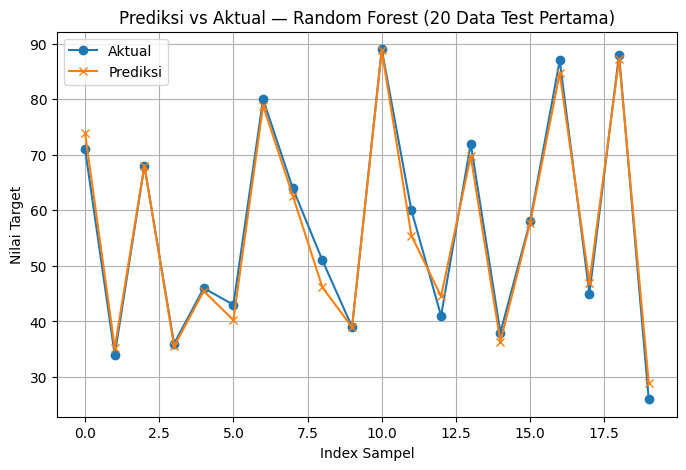

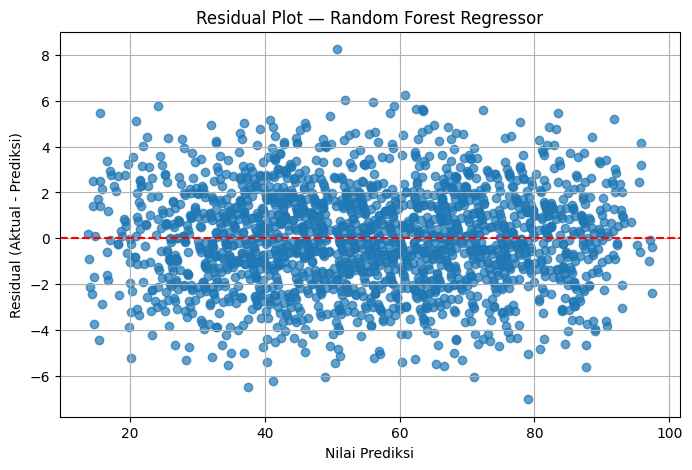

In [22]:
# Ambil model terbaik dari GridSearch
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Hitung metrik regresi
metrics_rf = {
    "R2": r2_score(y_test, y_pred_rf),
    "MSE": mean_squared_error(y_test, y_pred_rf),
    "MAE": mean_absolute_error(y_test, y_pred_rf),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rf))
}

print("Kombinasi model terbaik (Random Forest):", best_rf)
print("CV score terbaik (R²):", grid_rf.best_score_)

print("\n📊 Random Forest Regression Performance (Test Set):")
for k, v in metrics_rf.items():
    print(f"{k}: {v:.4f}")

# Tampilkan fitur terpilih dari feature selection
selector = best_rf.named_steps['selector']
if hasattr(selector, 'get_support'):
    mask = selector.get_support()
    selected = np.array(X.columns)[mask]
    print("\nFitur terbaik (terpilih):", selected)

# =========================
# Visualisasi Wajib (Regresi)
# =========================

# 1) Prediksi vs Aktual (20 data test pertama)
plt.figure(figsize=(8, 5))
plt.plot(np.array(y_test)[:20], label="Aktual", marker='o')
plt.plot(y_pred_rf[:20], label="Prediksi", marker='x')
plt.title("Prediksi vs Aktual — Random Forest (20 Data Test Pertama)")
plt.xlabel("Index Sampel")
plt.ylabel("Nilai Target")
plt.legend()
plt.grid(True)
plt.show()

# 2) Residual Plot (Test)
residuals = np.array(y_test) - y_pred_rf

plt.figure(figsize=(8, 5))
plt.scatter(y_pred_rf, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Plot — Random Forest Regressor")
plt.xlabel("Nilai Prediksi")
plt.ylabel("Residual (Aktual - Prediksi)")
plt.grid(True)
plt.show()

## VISUALISASI PERBANDINGAN MODEL ##

,R2,MAE,MSE,RMSE
Decision Tree,0.985189,1.876064,5.493508,2.343823
Random Forest,0.987257,1.738771,4.726513,2.174055


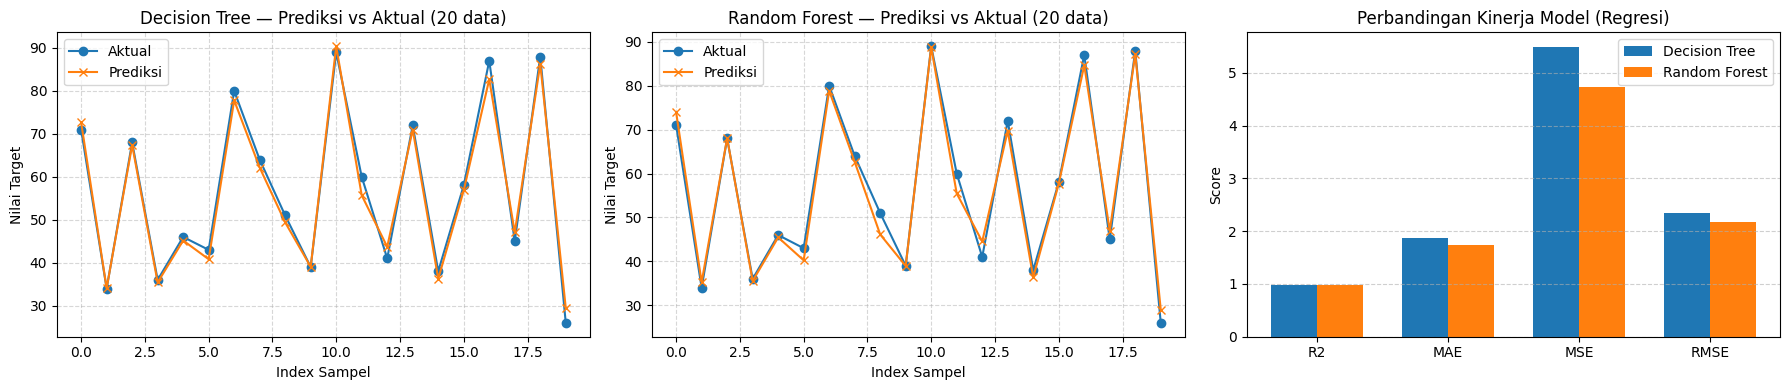

In [23]:
# ==============================================================
# 🎨 Visualisasi Gabungan: Decision Tree vs Random Forest (Regresi)
# ==============================================================

# Pastikan sudah punya:
# y_pred_dt  -> prediksi Decision Tree pada X_test
# y_pred_rf  -> prediksi Random Forest pada X_test

metrics_dt = {
    "R2": r2_score(y_test, y_pred_dt),
    "MAE": mean_absolute_error(y_test, y_pred_dt),
    "MSE": mean_squared_error(y_test, y_pred_dt),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_dt))
}

metrics_rf = {
    "R2": r2_score(y_test, y_pred_rf),
    "MAE": mean_absolute_error(y_test, y_pred_rf),
    "MSE": mean_squared_error(y_test, y_pred_rf),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rf))
}

df_compare = pd.DataFrame([metrics_dt, metrics_rf], index=["Decision Tree", "Random Forest"])
display(df_compare)

# Buat figure dengan 3 subplot (1 baris, 3 kolom)
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 4))

# 1) Prediksi vs Aktual (Decision Tree)
ax1.plot(np.array(y_test)[:20], label="Aktual", marker='o')
ax1.plot(np.array(y_pred_dt)[:20], label="Prediksi", marker='x')
ax1.set_title("Decision Tree — Prediksi vs Aktual (20 data)")
ax1.set_xlabel("Index Sampel")
ax1.set_ylabel("Nilai Target")
ax1.grid(True, linestyle="--", alpha=0.5)
ax1.legend()

# 2) Prediksi vs Aktual (Random Forest)
ax2.plot(np.array(y_test)[:20], label="Aktual", marker='o')
ax2.plot(np.array(y_pred_rf)[:20], label="Prediksi", marker='x')
ax2.set_title("Random Forest — Prediksi vs Aktual (20 data)")
ax2.set_xlabel("Index Sampel")
ax2.set_ylabel("Nilai Target")
ax2.grid(True, linestyle="--", alpha=0.5)
ax2.legend()

# 3) Grafik Bar Perbandingan Metrik
cols = df_compare.columns.tolist()
x = np.arange(len(cols))
width = 0.35

ax3.bar(x - width/2, df_compare.loc["Decision Tree"], width, label="Decision Tree")
ax3.bar(x + width/2, df_compare.loc["Random Forest"], width, label="Random Forest")

ax3.set_xticks(x)
ax3.set_xticklabels(cols)
ax3.set_ylabel("Score")
ax3.set_title("Perbandingan Kinerja Model (Regresi)")
ax3.legend()
ax3.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


## Feature dengan score tertinggi

In [24]:
# =========================
# Feature Importance — Decision Tree
# =========================

selector_dt = grid_dt.best_estimator_.named_steps['selector']

feature_scores_dt = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector_dt.scores_
}).sort_values(by='Score', ascending=False)

print("\n📈 Feature Importance (Decision Tree - f_regression):")
display(feature_scores_dt)
# =========================
# Feature Importance — Random Forest
# =========================

rf_model = grid_rf.best_estimator_.named_steps['reg']

feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n📈 Feature Importance (Random Forest):")
display(feature_importance_rf)



📈 Feature Importance (Decision Tree - f_regression):


,Feature,Score
1,Previous Scores,40702.686479
0,Hours Studied,1275.794884
3,Sleep Hours,21.539524
4,Sample Question Papers Practiced,14.530857
2,Extracurricular Activities,3.965003



📈 Feature Importance (Random Forest):


,Feature,Importance
1,Previous Scores,0.850446
0,Hours Studied,0.143880
3,Sleep Hours,0.002820
4,Sample Question Papers Practiced,0.002310
2,Extracurricular Activities,0.000544


## Model Terbaik

In [25]:
import pickle
from sklearn.metrics import r2_score

# Hitung R² pada data test
r2_dt = r2_score(y_test, y_pred_dt)
r2_rf = r2_score(y_test, y_pred_rf)

# Bandingkan model
if r2_rf >= r2_dt:
    best_model = best_rf
    best_name = "RandomForestRegressor"
else:
    best_model = best_dt
    best_name = "DecisionTreeRegressor"

# Simpan model terbaik
with open(f"model/BestModel_REG_{best_name}.pkl", "wb") as f:
    pickle.dump(best_model, f)

print(f"\n✅ Model terbaik: {best_name}")
print(f"✅ R² Decision Tree : {r2_dt:.4f}")
print(f"✅ R² Random Forest : {r2_rf:.4f}")
print(f"✅ File tersimpan sebagai: BestModel_REG_{best_name}.pkl")


FileNotFoundError: [Errno 2] No such file or directory: 'model/BestModel_REG_RandomForestRegressor.pkl'